# Color palettes: sequential and qualitative

Why do you like to see patterns and graphs more than simply rows and columns of data? The patterns stand out, the colours speak loud and the effect is visually pleasing.

But what if all graphs are made simple and plain? What if instead of using colours for the bars in a barplot, we use it only the for labels and axes?

Colors in graphs are very important. If used the right way, they can enhance your plot a great deal, but if not paid attention to, they could hide very important details.

Seaborn provides the option to use colours for visualising data, through a variety of palettes.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Re-use the UFO/Pollutants dataset

In [2]:
pollution_data = pd.read_csv("/Users/kamal/Desktop/work/20_JupyterNotebooks/Data/UFOPOLLUTANTS.csv")

pollution_data = pollution_data[:1000]

pollution_data.head()

,State.Code,city,state,day,month,year,hour,NO2.Mean,NO2.1st.Max.Value,NO2.1st.Max.Hour,...,O3.AQI,SO2.Mean,SO2.1st.Max.Value,SO2.1st.Max.Hour,SO2.AQI,CO.Mean,CO.1st.Max.Value,CO.1st.Max.Hour,CO.AQI,ET
0,4,kingman (desert&#44 out of),az,7,7,2000,21,7.375000,15.0,6,...,45,1.0000,1.0,0,1.0,0.195833,0.3,0,3.0,1
1,4,tacna (approx),az,7,7,2000,21,7.375000,15.0,6,...,45,1.0000,1.0,0,1.0,0.195833,0.3,0,3.0,1
2,4,apache junction,az,6,9,2001,21,7.708333,19.0,6,...,31,0.1875,0.3,2,NaN,0.175000,0.7,6,NaN,1
3,4,sedona,az,5,6,2005,21,7.916667,17.0,6,...,41,3.0000,3.0,0,4.0,0.416667,0.6,6,NaN,1
4,4,tucson,az,5,10,2007,2,8.625000,20.0,6,...,34,0.0375,0.3,23,NaN,0.212500,0.3,5,NaN,1


#### Color palettes
When Seaborn picks a color for any plot, it selects them in a rotation from a color palette. Once a plot has been displayed, it goes back to the beginning of the palette for the next plot. 

There is a default color palette used by Seaborn. Since Seaborn is built on Matplotlib, the full list of available color palettes can be found here: <br />
https://matplotlib.org/users/colormaps.html

The simplest way to choose colours in Seaborn is to call the color_palette() function.
* Most helpful when working with discrete colors
* You can pass in the name of any Seaborn palette, matplotlib colormap, list of colors specified in valid matplotlib formats (RGB tuples, hex color codes, HTML color names)
* If the function is called without any arguments, the default color cycle is returned.
* Combine this with a "with" function to temporarily set color to the plot
* You can also set the same using the set_palette function. This will then be used as the default matplotlib parameters for all plots that follow.

*The last two points are demonstrated below*

#### Create two subplots within a plot using the Set1 palette
The first subplot is for the Mean SO2 levels which appears in the shade of red which is the first colour in the Set1 palette. The CO levels is plotted with the second color in the palette - blue.

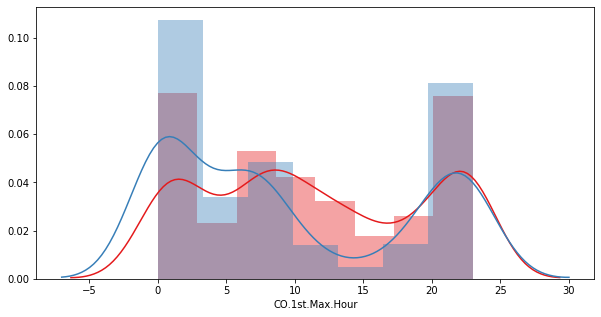

In [3]:
sns.set_palette("Set1")

fig , axis = plt.subplots(figsize = (10,5))

sns.distplot(pollution_data["SO2.1st.Max.Hour"])

sns.distplot(pollution_data["CO.1st.Max.Hour"])

plt.show()

#### The same palette will used for all subsequent plots
We don't explicitly set the palette now. The Set1 palette will be used until we specify a different palette to use. 

If we switch the order of the two plots here, their colors will also switch since the plot will first select red, then blue from the palette.

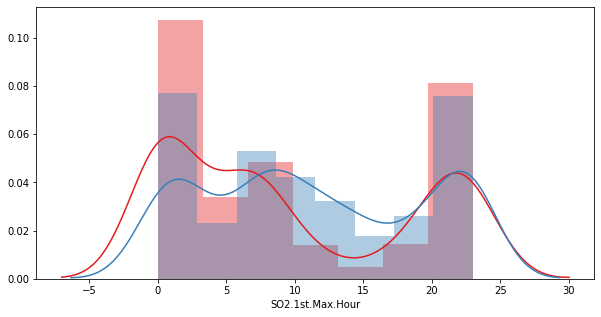

In [4]:
fig , axis = plt.subplots(figsize = (10,5))

sns.distplot(pollution_data["CO.1st.Max.Hour"])

sns.distplot(pollution_data["SO2.1st.Max.Hour"])

plt.show()

#### Use a different palette for just one figure

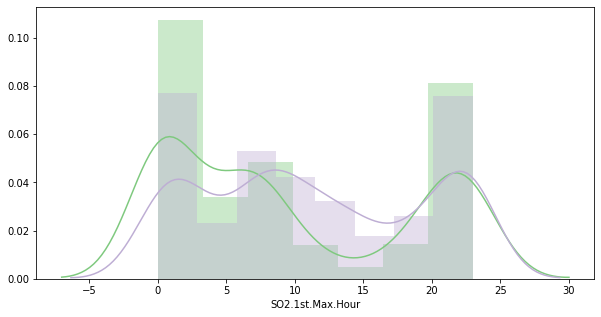

In [5]:
with sns.color_palette("Accent"):
    
    fig ,axis = plt.subplots(figsize = (10,5))

    sns.distplot(pollution_data["CO.1st.Max.Hour"])
    sns.distplot(pollution_data["SO2.1st.Max.Hour"])
    
plt.show()

#### Re-plot without setting a palette
The Set1 color palette is used once more

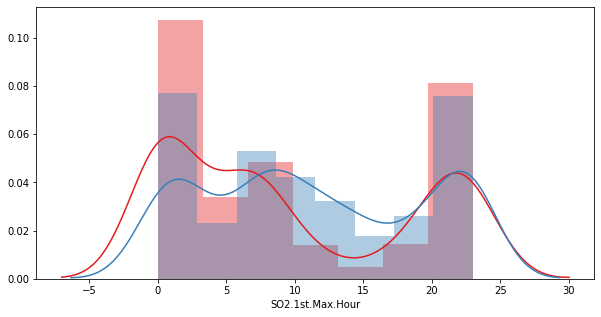

In [6]:
fig , axis = plt.subplots(figsize = (10,5))

sns.distplot(pollution_data["CO.1st.Max.Hour"])

sns.distplot(pollution_data["SO2.1st.Max.Hour"])

plt.show()

Depending on the kind of data you want to plot, you can choose from different categories of palettes:
* Qualitative palettes for categorical data
* Sequential or Diverging plots for large range of data 

## Qualitative Color Palettes

These palettes are mostly useful for plots that have categorical data, or data that varies in discrete chunks without an inherent ordering. It comes with 6 variations of default themes.

In [7]:
sns.set()

Let us use the Seaborn function palplot() to plot the values in the color palette as a horizontal array

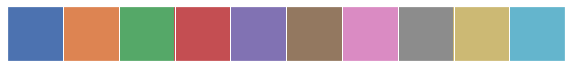

In [8]:
current_palette = sns.color_palette()

sns.palplot(current_palette)

plt.show()

#### What does this translate to in a graph?

Just to understand this, let us plot a graph that involves multiple lines of different colours. Invoking the kde plot with different bandwidths, as seen in module 1, we get the below:

#####  We want to use  the "notebook" contexts only for this example.That's why we use "with". Now we want to plot all the graph in same contexts (i.e notebook),that's why we use the "plt.rc_context" concept here.rc_context use the "notebook" style for all the five plot.

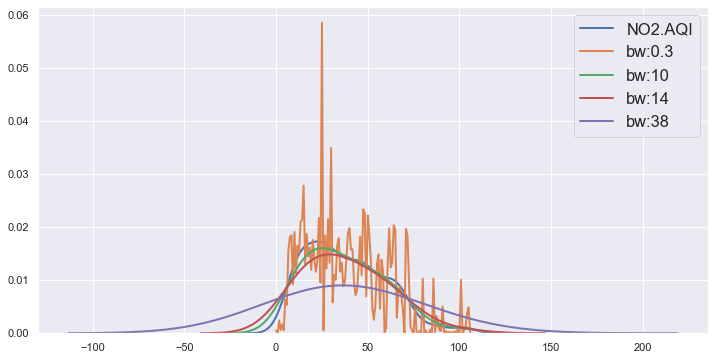

In [9]:
hist = plt.subplots(figsize = (12, 6))

    
with plt.rc_context(sns.plotting_context("notebook", 
                                          font_scale = 1.5 ,
                                          rc = {"lines.linewidth": 2})):
    
    
    sns.kdeplot(pollution_data["NO2.AQI"])

    sns.kdeplot(pollution_data["NO2.AQI"] ,
                bw = 0.3 , 
                label = "bw:0.3")

    sns.kdeplot(pollution_data["NO2.AQI"],
                bw = 10,
                label = "bw:10")

    sns.kdeplot(pollution_data["NO2.AQI"],
                bw = 14,
                label = "bw:14")

    sns.kdeplot(pollution_data["NO2.AQI"],
                bw = 38,
                label = "bw:38")
    
plt.show()

#### Set the number of colors in the palette
Using HLS palettes (Hue, Lightness, Saturation), we can set how many colors we would like

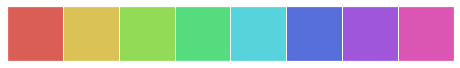

In [10]:
spec_num_color_palette = sns.palplot(sns.color_palette("hls" , 8))

plt.show()

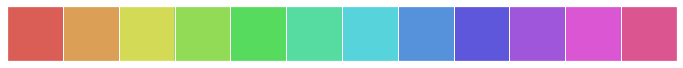

In [11]:
spec_num_color_palette = sns.palplot(sns.color_palette("hls" , 12))

plt.show()

#### Customize the HLS palette
Set the Lightness and Saturation levels for the colours in your HLS palette

* Varying the brightness and intensity of those plots
* Here, we are setting the lightness and saturation content of the hue.

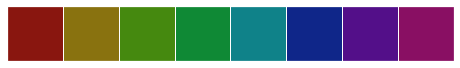

In [12]:
sns.palplot(sns.hls_palette(8 ,
                            l = 0.3 , 
                            s = 0.8))
plt.show()

#### Sequential color maps
Sequential maps are better suited for plotting continuous data

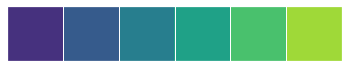

In [13]:
sns.palplot(sns.color_palette("viridis"))

plt.show()

In [14]:
pollutants_mean = pollution_data[['NO2.Mean', 
                                  'CO.Mean', 
                                  'SO2.Mean', 
                                  'O3.Mean']]

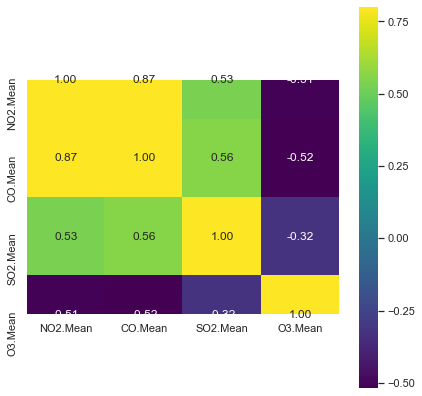

In [15]:
corrmatrix = pollutants_mean.corr()

plt.subplots(figsize = (7,7))

sns.heatmap(corrmatrix ,
            vmax = .8,
            square = True,
            annot = True, 
            fmt = ".2f", 
            cmap = "viridis")

plt.show()

### Can you specify colours explicitly?
Method1: List out the hex codes

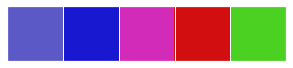

In [16]:
sns.palplot(sns.color_palette(["#5b59c6" ,
                               "#1918D1" ,
                               "#D32BB9" ,
                               "#D30E10" ,
                               "#4AD122"]))

plt.show()

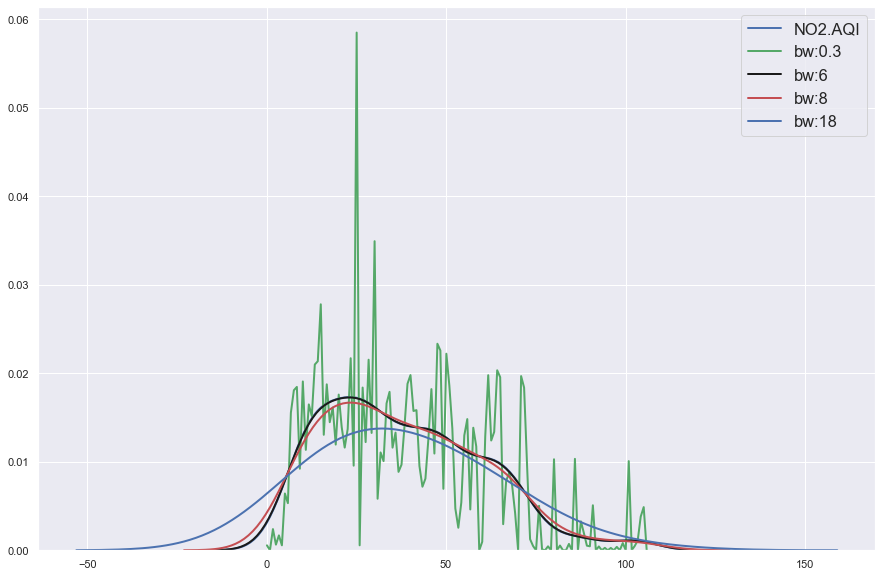

In [17]:
hist = plt.subplots(figsize=(15,10))

with plt.rc_context(sns.plotting_context("notebook", 
                                         font_scale = 1.5 ,
                                         rc = {"lines.linewidth": 2})):
    
    sns.kdeplot(pollution_data["NO2.AQI"])

    
    sns.kdeplot(pollution_data["NO2.AQI"] , 
                bw = 0.3 ,
                label = "bw:0.3",
                color = "g")

    
    sns.kdeplot(pollution_data["NO2.AQI"] ,
                bw = 6 , 
                label = "bw:6" ,
                color = "k")

    
    sns.kdeplot(pollution_data["NO2.AQI"] ,
                bw = 8 , 
                label = "bw:8" ,
                color = "r")

    
    sns.kdeplot(pollution_data["NO2.AQI"] ,
                bw = 18 , 
                label = "bw:18",
                color = "b")
    
plt.show()